In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('df.pkl')
df

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,76953,515,4,660.000000,26,2,0,1,4.902003,22215.0
1,14,84318,515,4,660.000000,26,2,0,1,4.633973,22215.0
2,14,85579,340,4,520.000000,32,2,0,1,4.995608,20978.0
3,14,69671,340,4,520.000000,32,2,0,1,7.126296,40722.0
4,14,14001,852,14,659.097938,81,1,0,1,4.354864,14126.0
...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,6,700.000000,52,2,0,1,3.680000,NaN
9597,22,58769,239,6,700.000000,32,2,0,1,4.250000,NaN
9598,22,58769,239,6,700.000000,59,2,0,1,4.070000,NaN
9599,22,88928,239,6,700.000000,40,2,0,1,4.572700,NaN


La estrategia que vamos a desarrollar va a ser codificar la variable ID_ESTACION por la media para cada estacion de la variable meteorológica que más correlación tenga con la variable PRODUCCION

In [3]:
#Definimos una funcion para meter las variables meteorológicas de interés
def metervariables(df):
    meses=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio']
    for m in range(len(meses)):
        precip_col = f"precip_{meses[m]}"
        df[precip_col] = np.nan

    # Rellenamos los valores de precip_mes en función de CAMPAÑA y ID_ESTACION
    for c in range(16, 23):
        for e in range(20):
            for m in range(6):
                precip_mes = globals()[f"precip_mes_{c}"][e][m]
                mes_index = meses[m]
                precip_col = f"precip_{mes_index}"
                df.loc[(df['CAMPAÑA'] == c) & (df['ID_ESTACION'] == e), precip_col] = precip_mes
    
    for m in range(len(meses)):
        windspeed_col = f"windspeed_{meses[m]}"
        df[windspeed_col] = np.nan

    # Rellenamos los valores de windspeed_mes en función de CAMPAÑA y ID_ESTACION
    for c in range(16, 23):
        for e in range(20):
            for m in range(6):
                windspeed_mes = globals()[f"windspeed_mes_{c}"][e][m]
                mes_index = meses[m]
                windspeed_col = f"windspeed_{mes_index}"
                df.loc[(df['CAMPAÑA'] == c) & (df['ID_ESTACION'] == e), windspeed_col] = windspeed_mes

    # Rellenamos los valores de temp_mes en función de CAMPAÑA y ID_ESTACION
    for m in range(len(meses)):
        temp_col = f"t_mes_{meses[m]}"
        df[temp_col] = np.nan
    for c in range(16, 23):
        for e in range(20):
            for m in range(6):
                temp_mes = globals()[f"t_mes_{c}"][e][m]
                mes_index = meses[m]
                temp_col = f"t_mes_{mes_index}"
                df.loc[(df['CAMPAÑA'] == c) & (df['ID_ESTACION'] == e), temp_col] = temp_mes
    for m in range(len(meses)):
        rhum_col = f"rhum_mes_{meses[m]}"
        df[rhum_col] = np.nan
    for c in range(16, 23):
        for e in range(20):
            for m in range(6):
                rhum_mes = globals()[f"rhum_mes_{c}"][e][m]
                mes_index = meses[m]
                rhum_col = f"rhum_mes_{mes_index}"
                df.loc[(df['CAMPAÑA'] == c) & (df['ID_ESTACION'] == e), rhum_col] = rhum_mes
    return df

In [4]:
#Importamos las variables
import pickle

with open('rhum_mes_16.pkl', 'rb') as file:
    rhum_mes_16 = pickle.load(file)
    
with open('rhum_mes_17.pkl', 'rb') as file:
    rhum_mes_17 = pickle.load(file)
    
with open('rhum_mes_18.pkl', 'rb') as file:
    rhum_mes_18 = pickle.load(file)
    
with open('rhum_mes_19.pkl', 'rb') as file:
    rhum_mes_19 = pickle.load(file)
    
with open('rhum_mes_20.pkl', 'rb') as file:
    rhum_mes_20 = pickle.load(file)
    
with open('rhum_mes_21.pkl', 'rb') as file:
    rhum_mes_21 = pickle.load(file)
    
with open('rhum_mes_22.pkl', 'rb') as file:
    rhum_mes_22 = pickle.load(file)

with open('windspeed_mes_16.pkl', 'rb') as file:
    windspeed_mes_16 = pickle.load(file)
    
with open('windspeed_mes_17.pkl', 'rb') as file:
    windspeed_mes_17 = pickle.load(file)
    
with open('windspeed_mes_18.pkl', 'rb') as file:
    windspeed_mes_18 = pickle.load(file)
    
with open('windspeed_mes_19.pkl', 'rb') as file:
    windspeed_mes_19 = pickle.load(file)
    
with open('windspeed_mes_20.pkl', 'rb') as file:
    windspeed_mes_20 = pickle.load(file)
    
with open('windspeed_mes_21.pkl', 'rb') as file:
    windspeed_mes_21 = pickle.load(file)
    
with open('windspeed_mes_22.pkl', 'rb') as file:
    windspeed_mes_22 = pickle.load(file)

with open('t_mes_15.pkl', 'rb') as file:
    t_mes_15 = pickle.load(file)
    
with open('t_mes_16.pkl', 'rb') as file:
    t_mes_16 = pickle.load(file)
    
with open('t_mes_17.pkl', 'rb') as file:
    t_mes_17 = pickle.load(file)
    
with open('t_mes_18.pkl', 'rb') as file:
    t_mes_18 = pickle.load(file)
    
with open('t_mes_19.pkl', 'rb') as file:
    t_mes_19 = pickle.load(file)
    
with open('t_mes_20.pkl', 'rb') as file:
    t_mes_20 = pickle.load(file)
    
with open('t_mes_21.pkl', 'rb') as file:
    t_mes_21 = pickle.load(file)
    
with open('t_mes_22.pkl', 'rb') as file:
    t_mes_22 = pickle.load(file)

with open('precip_mes_16.pkl', 'rb') as file:
    precip_mes_16 = pickle.load(file)

with open('precip_mes_17.pkl', 'rb') as file:
    precip_mes_17 = pickle.load(file)

with open('precip_mes_18.pkl', 'rb') as file:
    precip_mes_18 = pickle.load(file)

with open('precip_mes_19.pkl', 'rb') as file:
    precip_mes_19 = pickle.load(file)

with open('precip_mes_20.pkl', 'rb') as file:
    precip_mes_20 = pickle.load(file)

with open('precip_mes_21.pkl', 'rb') as file:
    precip_mes_21 = pickle.load(file)

with open('precip_mes_22.pkl', 'rb') as file:
    precip_mes_22 = pickle.load(file)


In [5]:
#Creamos un dataframe df2 donde metemos las variables meteorológicas
df2=metervariables(df)
df = pd.read_pickle('df.pkl')

In [6]:
#Estación 4
#Para la estación 4, no hay informacion para muchas de las variables meteorológicas
df2[df2['ID_ESTACION']==4]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,t_mes_marzo,t_mes_abril,t_mes_mayo,t_mes_junio,rhum_mes_enero,rhum_mes_febrero,rhum_mes_marzo,rhum_mes_abril,rhum_mes_mayo,rhum_mes_junio
0,14,76953,515,4,660.0,26,2,0,1,4.902003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,84318,515,4,660.0,26,2,0,1,4.633973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,85579,340,4,520.0,32,2,0,1,4.995608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,69671,340,4,520.0,32,2,0,1,7.126296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Como son solo 4 observaciones decidimos eliminarlas
df = df.drop(df[df['ID_ESTACION'] == 4].index)
df2 = df2.drop(df2[df2['ID_ESTACION'] == 4].index)

In [8]:
#Definimos una función que calcule la media de las varaibles meteorológicas para cada ID_ESTACION en los meses enero-junio
def calcular_variable_media(df,columnas_meses):
    # Filtrar el DataFrame para mantener solo las columnas de los meses de enero a junio y la columna 'ID_ESTACION'
    df_filt = df[columnas_meses + ['ID_ESTACION']].copy()

    # Calcular la temperatura media para cada valor de ID_ESTACION
    df_media_temperaturas = df_filt.groupby('ID_ESTACION')[columnas_meses].mean()
    df_media_temperaturas = df_media_temperaturas.reset_index()

    return df_media_temperaturas

Aplicamos la funcion anterior y vamos metiendo los resultados obtenidos en nuestro dataframe:

In [9]:
df_media=calcular_variable_media(df2, columnas_meses = ['windspeed_enero', 'windspeed_febrero', 'windspeed_marzo', 'windspeed_abril', 'windspeed_mayo', 'windspeed_junio'])

In [10]:
encoded_id_estacion=df_media.groupby('ID_ESTACION').mean().mean(axis=1).reset_index(name='windspeed_media')
encoded_id_estacion

,ID_ESTACION,windspeed_media
0,0,8.055134
1,1,13.853971
2,2,10.309313
3,3,12.022968
4,5,10.712688
5,6,11.664805
6,7,11.258397
7,8,12.295432
8,9,10.534987
9,10,10.132563


In [11]:
df['windspeed_media'] = df['ID_ESTACION'].map(encoded_id_estacion.set_index('ID_ESTACION')['windspeed_media'])

In [12]:
df_media_temperaturas=calcular_variable_media(df2, columnas_meses = ['t_mes_enero', 't_mes_febrero', 't_mes_marzo', 't_mes_abril', 't_mes_mayo', 't_mes_junio'])

In [13]:
encoded_id_estacion=df_media_temperaturas.groupby('ID_ESTACION').mean().mean(axis=1).reset_index(name='tmedia')
encoded_id_estacion

,ID_ESTACION,tmedia
0,0,14.287836
1,1,11.802972
2,2,13.947971
3,3,12.972376
4,5,12.963303
5,6,12.589099
6,7,13.316537
7,8,12.737542
8,9,13.657491
9,10,14.182774


In [14]:
df['t_media'] = df['ID_ESTACION'].map(encoded_id_estacion.set_index('ID_ESTACION')['tmedia'])

In [15]:
df_media=calcular_variable_media(df2, columnas_meses = ['rhum_mes_enero', 'rhum_mes_febrero', 'rhum_mes_marzo', 'rhum_mes_abril', 'rhum_mes_mayo', 'rhum_mes_junio'])

In [16]:
encoded_id_estacion=df_media.groupby('ID_ESTACION').mean().mean(axis=1).reset_index(name='rhum_media')
encoded_id_estacion

,ID_ESTACION,rhum_media
0,0,68.650047
1,1,65.857631
2,2,64.302105
3,3,66.280790
4,5,66.633674
5,6,66.438743
6,7,65.982460
7,8,66.031945
8,9,65.956254
9,10,65.434847


In [17]:
df['rhum_media'] = df['ID_ESTACION'].map(encoded_id_estacion.set_index('ID_ESTACION')['rhum_media'])

In [18]:
df_media=calcular_variable_media(df2, columnas_meses = ['precip_enero', 'precip_febrero', 'precip_marzo', 'precip_abril', 'precip_mayo', 'precip_junio'])

In [19]:
encoded_id_estacion=df_media.groupby('ID_ESTACION').mean().mean(axis=1).reset_index(name='precip_media')
encoded_id_estacion

,ID_ESTACION,precip_media
0,0,65.166667
1,1,55.575000
2,2,39.023481
3,3,40.346064
4,5,41.422958
5,6,55.656785
6,7,39.262180
7,8,38.912033
8,9,40.980680
9,10,49.085008


In [20]:
df['precip_media'] = df['ID_ESTACION'].map(encoded_id_estacion.set_index('ID_ESTACION')['precip_media'])

Una variable que no incluimos en nuestros modelos anteriores y que podría ser relevante es el índice de radiación ultravioleta.
Acudimos a la base de datos de Meteo para obtener información sobre esta variable.

In [21]:
meteo = pd.read_csv('DATOS_METEO.txt', delimiter='|')

In [22]:
# Creamos columnas separadas para el año, mes, día y hora
meteo['validTimeUtc'] = pd.to_datetime(meteo['validTimeUtc'])

meteo['año'] = meteo['validTimeUtc'].dt.year
meteo['mes'] = meteo['validTimeUtc'].dt.month
meteo['dia'] = meteo['validTimeUtc'].dt.day
meteo['hora'] = meteo['validTimeUtc'].dt.hour

meteo

,validTimeUtc,precip1Hour,precip6Hour,precip24Hour,precip2Day,precip3Day,precip7Day,precipMtd,precipYtd,pressureChange,...,uvIndex,visibility,windDirection,windGust,windSpeed,ID_ESTACION,año,mes,dia,hora
0,2015-06-29 16:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.4,...,2.0,16.09,NaN,NaN,18.7,13,2015,6,29,16
1,2015-06-29 17:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.0,...,1.0,16.09,NaN,NaN,18.0,13,2015,6,29,17
2,2015-06-29 18:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.3,...,0.0,16.09,NaN,NaN,16.6,13,2015,6,29,18
3,2015-06-29 19:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,...,0.0,16.09,NaN,NaN,15.1,13,2015,6,29,19
4,2015-06-29 20:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.9,...,0.0,16.09,NaN,NaN,10.1,13,2015,6,29,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223655,2022-06-30 19:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,2.7,...,0.0,13.55,110.0,NaN,10.8,8,2022,6,30,19
1223656,2022-06-30 20:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,3.7,...,0.0,13.59,80.0,NaN,9.0,8,2022,6,30,20
1223657,2022-06-30 21:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,3.8,...,0.0,13.85,80.0,NaN,7.9,8,2022,6,30,21
1223658,2022-06-30 22:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,3.1,...,0.0,13.17,50.0,NaN,8.3,8,2022,6,30,22


In [23]:
encoded_id_estacion = meteo[meteo['mes'].isin([1,2,3,4,5,6])].groupby(['ID_ESTACION'])[['uvIndex']].mean()
encoded_id_estacion

,uvIndex
ID_ESTACION,
0,1.361512
1,1.370795
2,1.391665
3,1.365001
4,1.380275
5,1.365692
6,1.353117
7,1.368457
8,1.366779


In [24]:
#Mergeamos
df= df.merge(
    encoded_id_estacion, 
    left_on='ID_ESTACION',
    right_index=True).sort_index()
df

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION,windspeed_media,t_media,rhum_media,precip_media,uvIndex
4,14,14001,852,14,659.097938,81,1,0,1,4.354864,14126.0,12.172118,12.094942,66.492972,40.389625,1.366548
5,14,17059,852,14,659.097938,81,1,0,1,2.773533,6054.0,12.172118,12.094942,66.492972,40.389625,1.366548
6,14,87611,602,14,659.097938,81,1,0,1,5.377166,12900.0,12.172118,12.094942,66.492972,40.389625,1.366548
7,14,12257,215,14,659.097938,17,1,0,1,2.148042,5450.0,12.172118,12.094942,66.492972,40.389625,1.366548
8,14,97286,142,14,659.097938,17,1,0,1,5.390867,30720.0,12.172118,12.094942,66.492972,40.389625,1.366548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,6,700.000000,52,2,0,1,3.680000,NaN,11.664805,12.589099,66.438743,55.656785,1.353117
9597,22,58769,239,6,700.000000,32,2,0,1,4.250000,NaN,11.664805,12.589099,66.438743,55.656785,1.353117
9598,22,58769,239,6,700.000000,59,2,0,1,4.070000,NaN,11.664805,12.589099,66.438743,55.656785,1.353117
9599,22,88928,239,6,700.000000,40,2,0,1,4.572700,NaN,11.664805,12.589099,66.438743,55.656785,1.353117


Ahora vamos a ver variable meteorológica está más correlacionada con la Produccion.

In [25]:
correlations = df.corr()['PRODUCCION'].drop('PRODUCCION')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

SUPERFICIE         0.758146
MODO               0.270606
precip_media       0.181404
ALTITUD            0.146438
windspeed_media    0.131001
uvIndex            0.130138
t_media            0.117513
rhum_media         0.088291
ID_ESTACION        0.079442
ID_FINCA           0.042188
COLOR              0.041029
VARIEDAD           0.035179
TIPO               0.032299
ID_ZONA            0.032092
CAMPAÑA            0.027473
Name: PRODUCCION, dtype: float64

Vamos a usar F-test y mutual information para captar relaciones no lineales

In [26]:
from sklearn.feature_selection import f_regression, mutual_info_regression
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [27]:
# convertimos el DataFrame al formato necesario para scikit-learn
datos=df[df['CAMPAÑA'] != 22]
datos=datos.drop(['CAMPAÑA','ID_FINCA','ID_ZONA','ID_ESTACION','ALTITUD','VARIEDAD','MODO','TIPO','COLOR','SUPERFICIE'],axis=1)
datos

,PRODUCCION,windspeed_media,t_media,rhum_media,precip_media,uvIndex
4,14126.0,12.172118,12.094942,66.492972,40.389625,1.366548
5,6054.0,12.172118,12.094942,66.492972,40.389625,1.366548
6,12900.0,12.172118,12.094942,66.492972,40.389625,1.366548
7,5450.0,12.172118,12.094942,66.492972,40.389625,1.366548
8,30720.0,12.172118,12.094942,66.492972,40.389625,1.366548
...,...,...,...,...,...,...
8521,28160.1,11.664805,12.589099,66.438743,55.656785,1.353117
8522,41310.0,11.664805,12.589099,66.438743,55.656785,1.353117
8523,45420.0,11.664805,12.589099,66.438743,55.656785,1.353117
8524,56140.0,11.664805,12.589099,66.438743,55.656785,1.353117


In [28]:
data = datos.values 

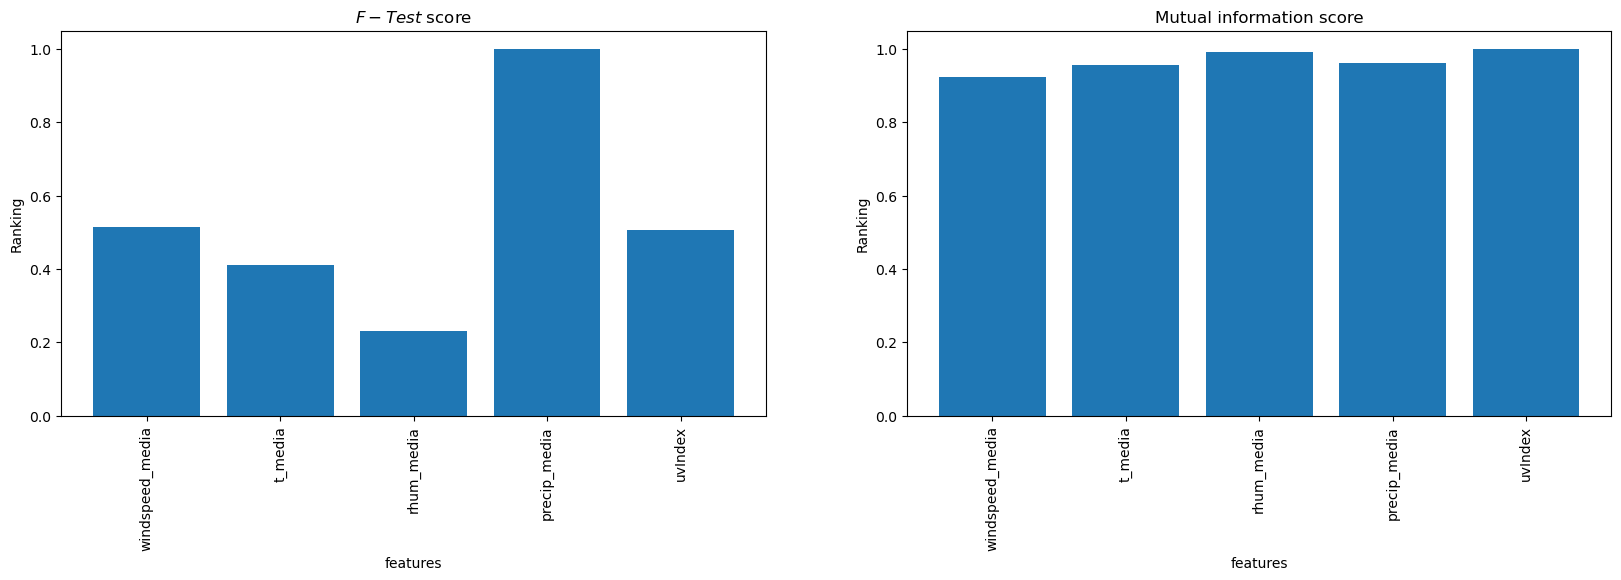

In [29]:
y = data[:,0:1]     #  Produccion
X = data[:,1:]      # el resto de variables meteorológicas

feature_names = datos.columns[1:]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [30]:
#Vamos a utilizar para codificar ID_ESTACION la variable precip_media

In [31]:
df=df.drop(['t_media','rhum_media','uvIndex','ID_ESTACION','windspeed_media'],axis=1)

In [32]:
df

,CAMPAÑA,ID_FINCA,ID_ZONA,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION,precip_media
4,14,14001,852,659.097938,81,1,0,1,4.354864,14126.0,40.389625
5,14,17059,852,659.097938,81,1,0,1,2.773533,6054.0,40.389625
6,14,87611,602,659.097938,81,1,0,1,5.377166,12900.0,40.389625
7,14,12257,215,659.097938,17,1,0,1,2.148042,5450.0,40.389625
8,14,97286,142,659.097938,17,1,0,1,5.390867,30720.0,40.389625
...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,700.000000,52,2,0,1,3.680000,NaN,55.656785
9597,22,58769,239,700.000000,32,2,0,1,4.250000,NaN,55.656785
9598,22,58769,239,700.000000,59,2,0,1,4.070000,NaN,55.656785
9599,22,88928,239,700.000000,40,2,0,1,4.572700,NaN,55.656785


## Estudio de Outliers

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df14=df[df['CAMPAÑA']==14]
df15=df[df['CAMPAÑA']==15]
df16=df[df['CAMPAÑA']==16]
df17=df[df['CAMPAÑA']==17]
df18=df[df['CAMPAÑA']==18]
df19=df[df['CAMPAÑA']==19]
df20=df[df['CAMPAÑA']==20]
df21=df[df['CAMPAÑA']==21]

La metodología para el estudio de posibles outliers será la siguiente: 
- Dibujamos scatterplots para las variables que mayor correlación presentan con la variable a predecir (PRODUCCIÓN) en los distintos años.
- Vemos si las observaciones que pueden ser consideradas outliers se mantienen todos los años o solo en años concretos.
              - Si se mantienen los mismos patrones todos los años, no tratamos la observación.
              - En caso contrario, la tratamos.

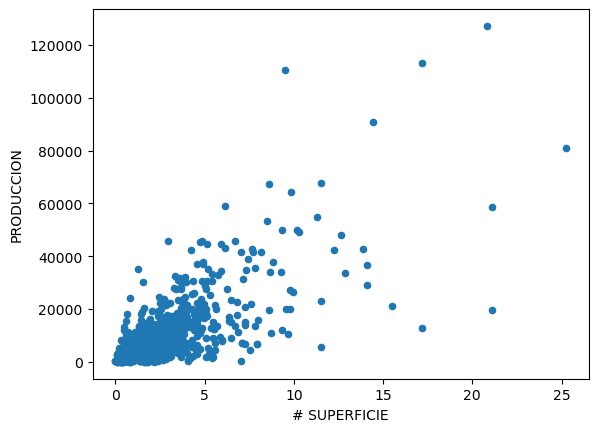

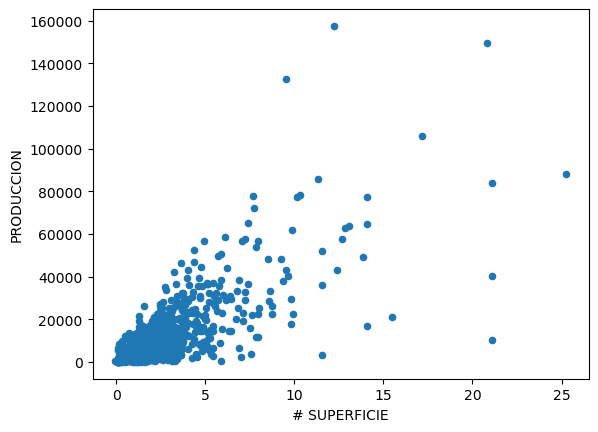

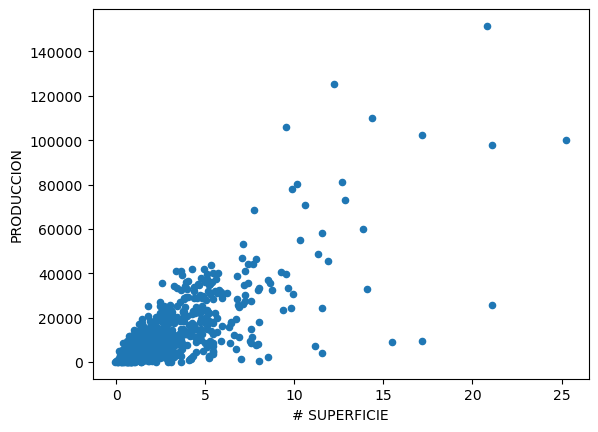

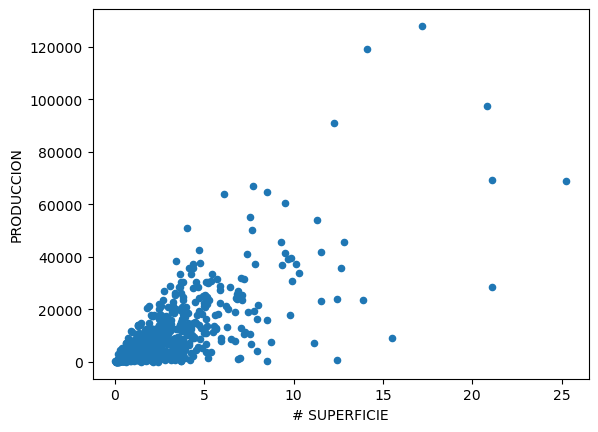

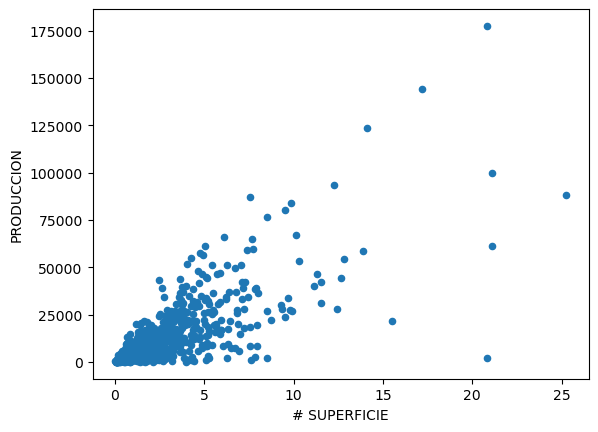

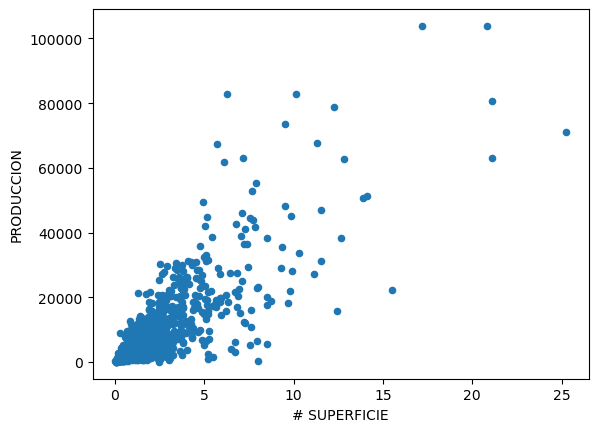

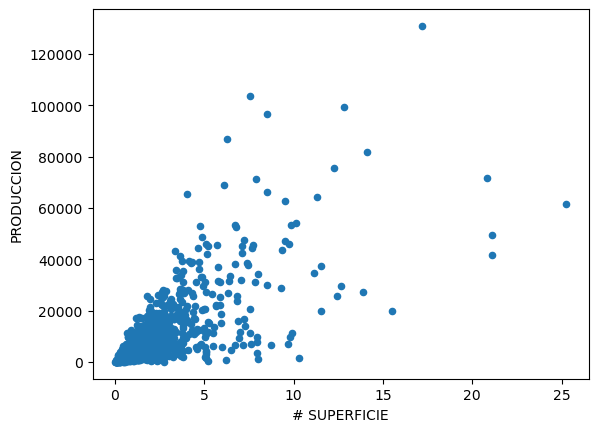

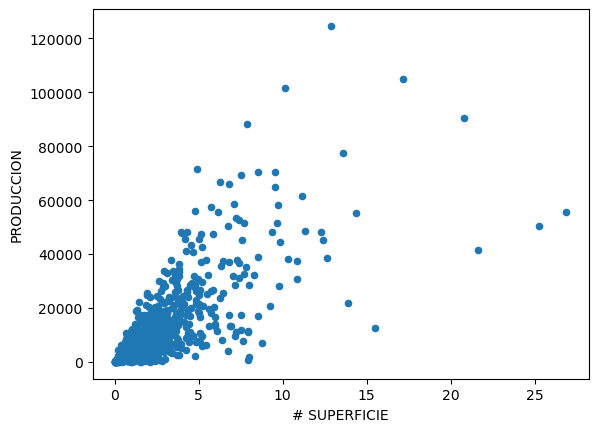

In [35]:
#Grafico x=SUPERFICIE
df14.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df15.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df16.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df17.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df18.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df19.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df20.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()

df21.plot(kind = 'scatter',x='SUPERFICIE',y = 'PRODUCCION')
plt.xlabel('# SUPERFICIE')
plt.ylabel('PRODUCCION')
plt.show()


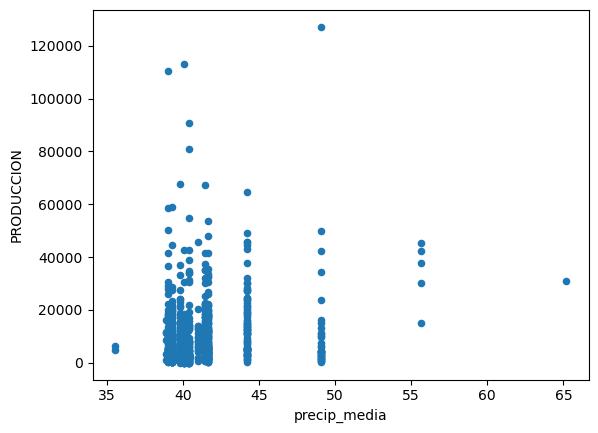

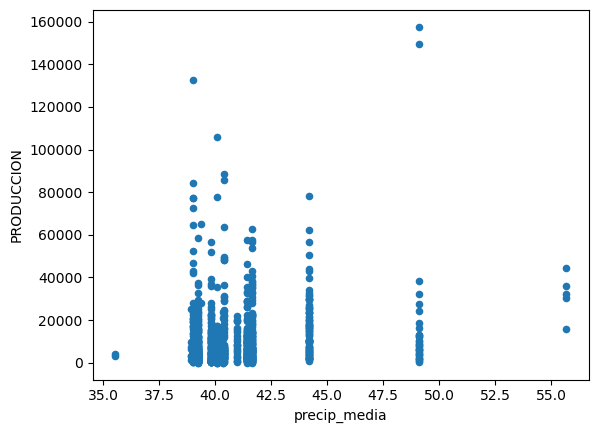

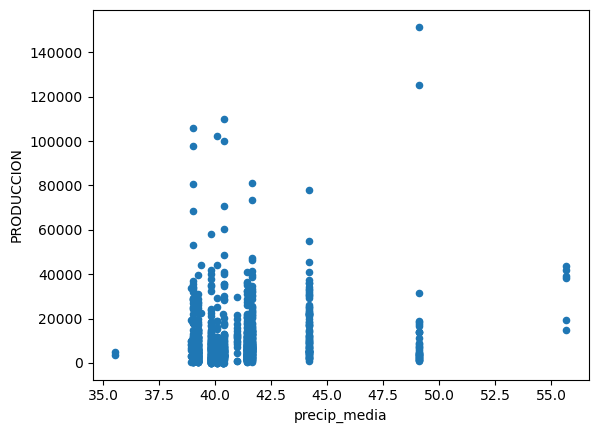

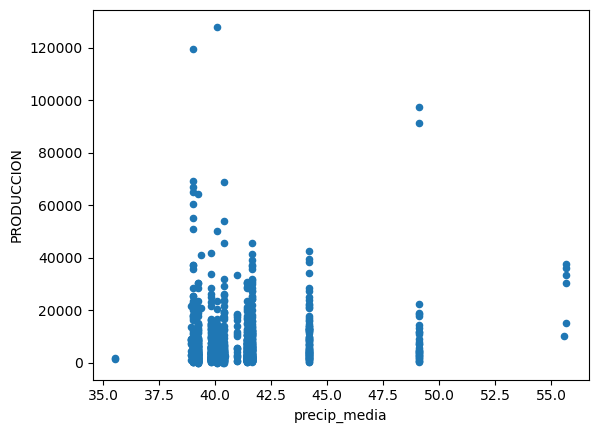

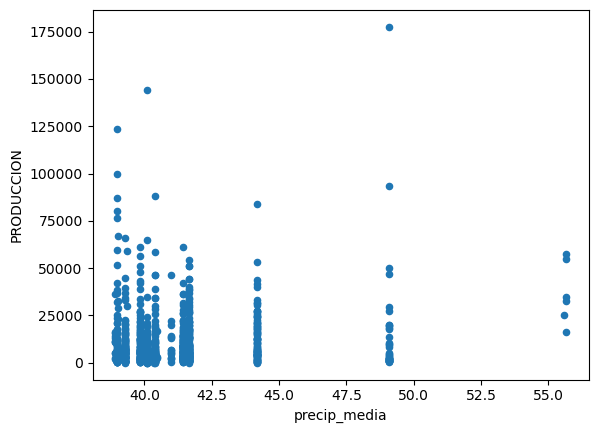

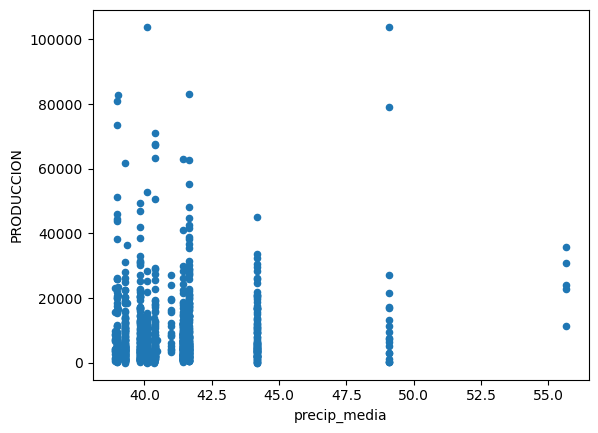

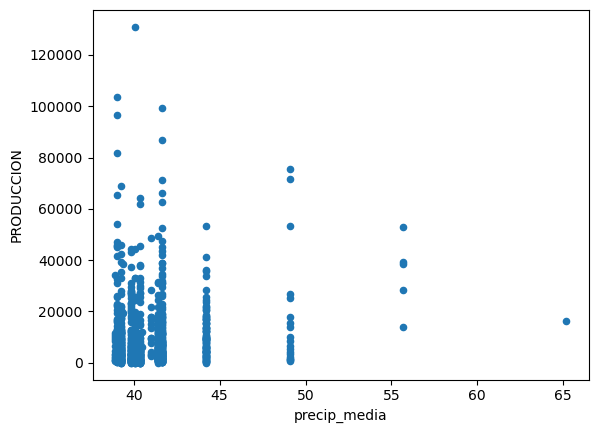

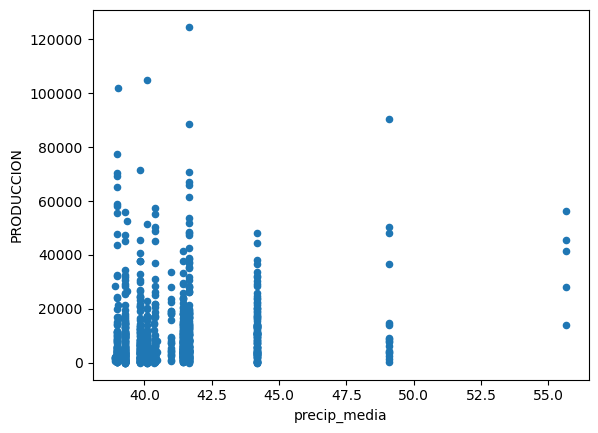

In [36]:
# Gráfico para x=precip_media
df14.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df15.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df16.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df17.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df18.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df19.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df20.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

df21.plot(kind='scatter', x='precip_media', y='PRODUCCION')
plt.xlabel('precip_media')
plt.ylabel('PRODUCCION')
plt.show()

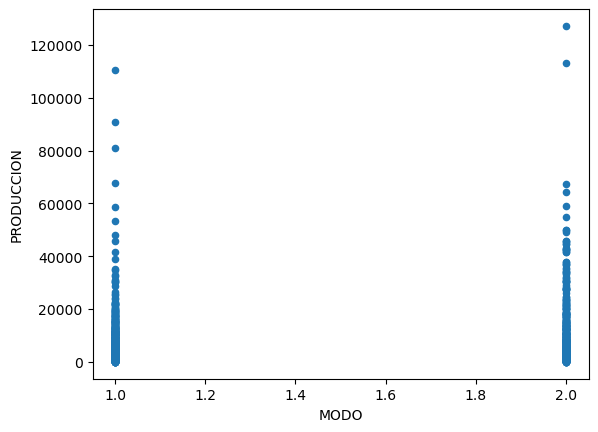

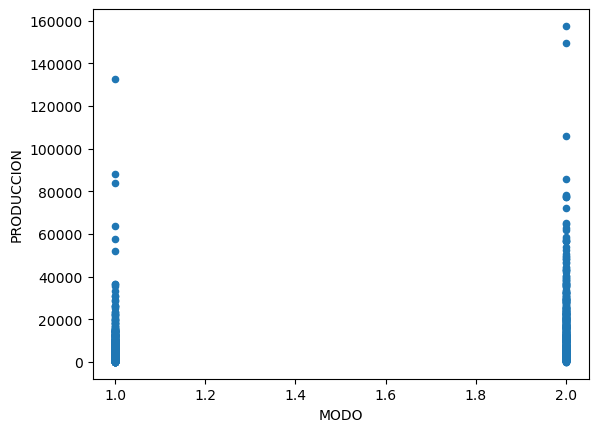

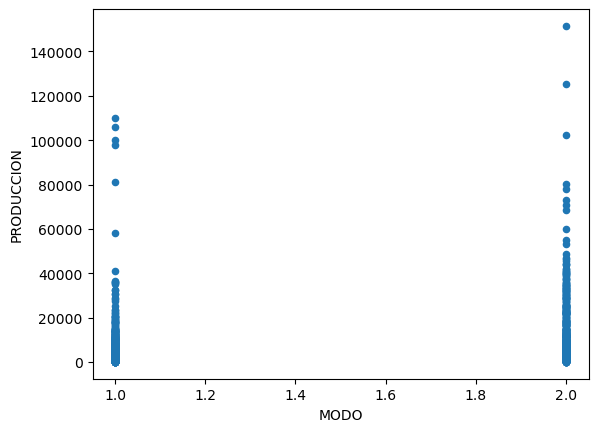

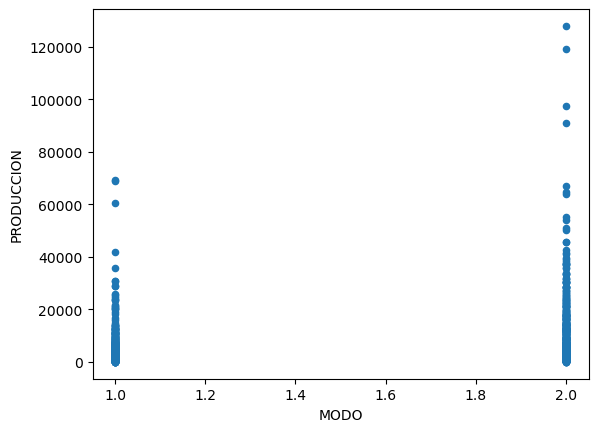

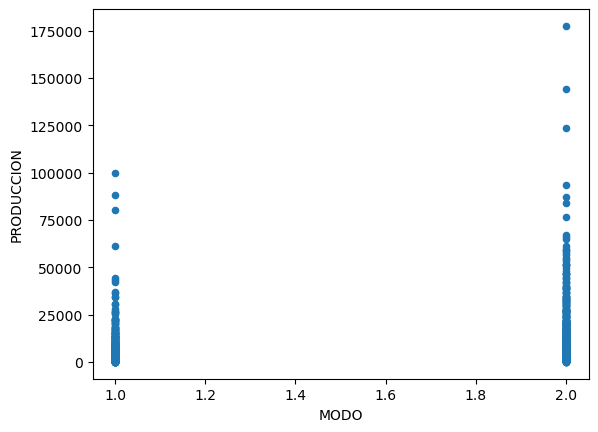

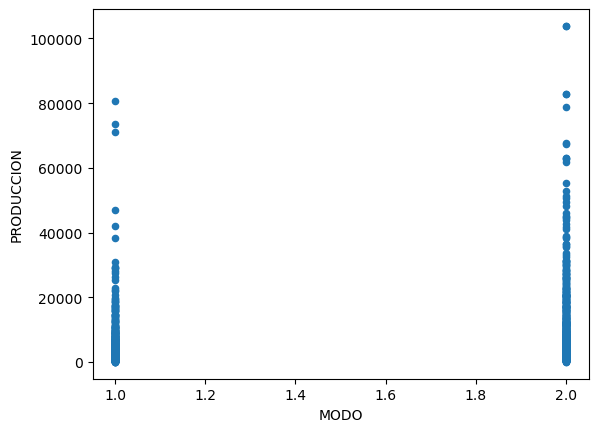

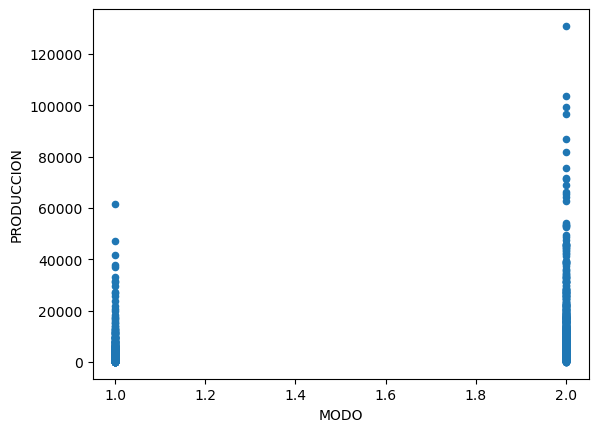

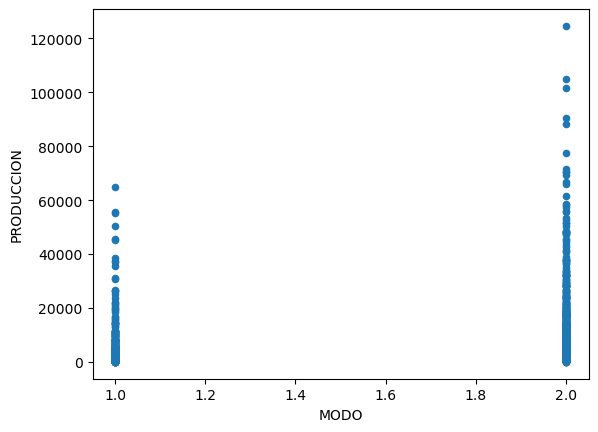

In [37]:
df14.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df15.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df16.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df17.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df18.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df19.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df20.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()

df21.plot(kind='scatter', x='MODO', y='PRODUCCION')
plt.xlabel('MODO')
plt.ylabel('PRODUCCION')
plt.show()


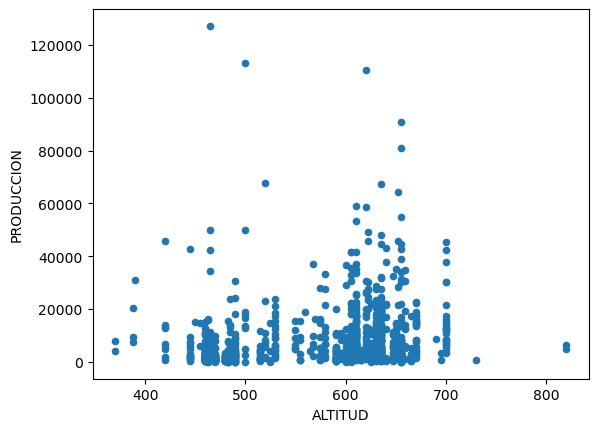

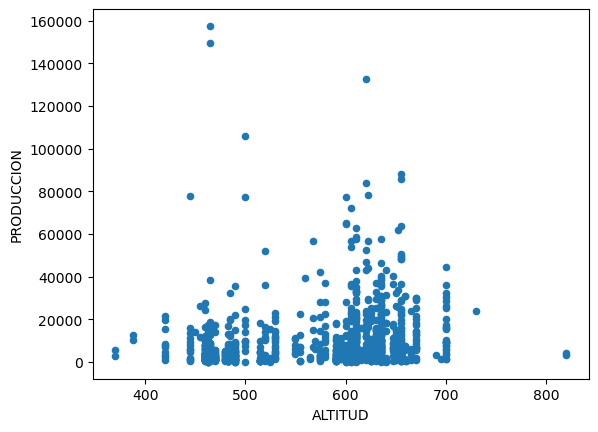

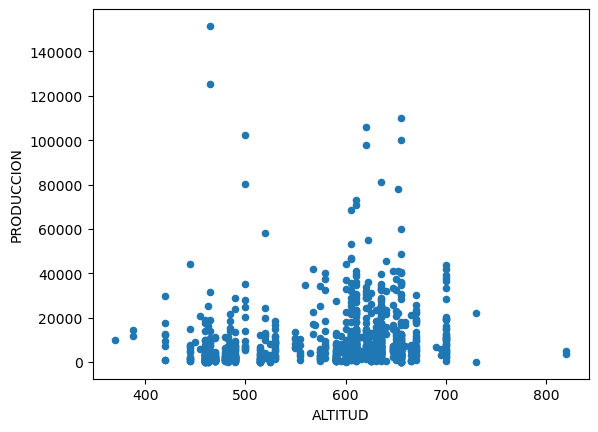

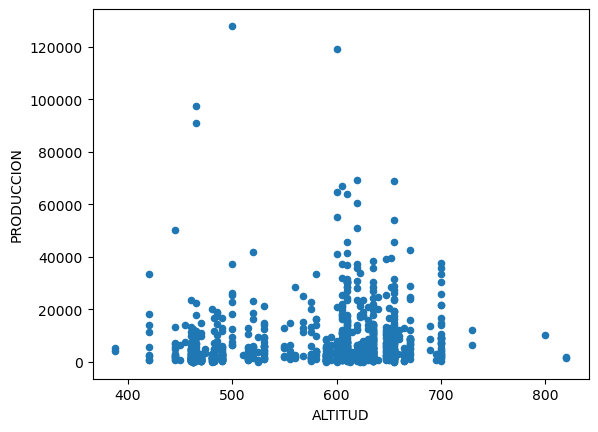

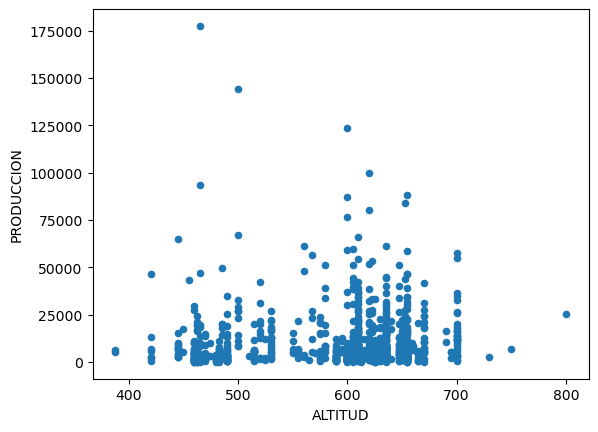

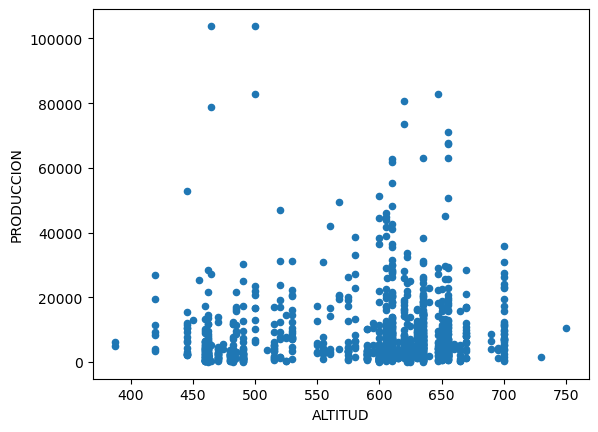

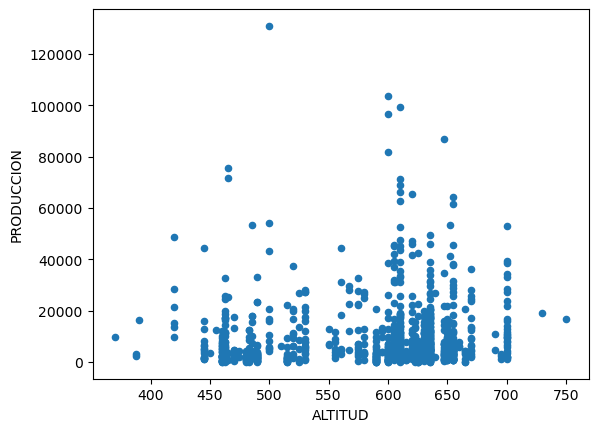

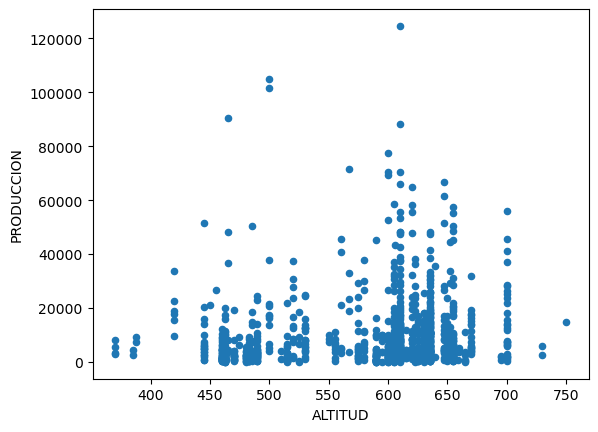

In [38]:
df14.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df15.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df16.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df17.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df18.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df19.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df20.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()

df21.plot(kind='scatter', x='ALTITUD', y='PRODUCCION')
plt.xlabel('ALTITUD')
plt.ylabel('PRODUCCION')
plt.show()


Como los patrones de las observaciones son similares para todos los años para las variables más correlacionadas con PRODUCCIÓN,
decidimos no tratar ninguna observación

## MODELOS

In [39]:
#Creamos un diccionario para ir guardando los resultados
results_test = {
    'XGboost': {'RMSE': None, 'MAE': None, 'R2': None},
    'GradientBoost': {'RMSE': None, 'MAE': None, 'R2': None},
    'Red Neuronal': {'RMSE': None, 'MAE': None, 'R2':None},
    'Bagging': {'RMSE': None, 'MAE': None, 'R2': None}
}
results_train = {
    'XGboost': {'RMSE': None, 'MAE': None, 'R2': None},
    'GradientBoots': {'RMSE': None, 'MAE': None, 'R2': None},
    'Bagging': {'RMSE': None, 'MAE': None, 'R2': None},
    'Red Neuronal': {'RMSE': None, 'MAE': None, 'R2':None}
}

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## Conjunto de Entrenamiento

In [41]:
#Conjunto de datos de entrenamiento
df1421=df[df['CAMPAÑA'] != 22]

In [42]:
#Train y evaluación
X = df1421.drop('PRODUCCION', axis=1).values
y = df1421['PRODUCCION'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Gradient Boosting

In [43]:
# Creamos el modelo de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.15, max_depth=6, random_state=42)

# Ajustamos el modelo con los datos de entrenamiento
gbr.fit(X_train, y_train)

y_pred_test=gbr.predict(X_test)

In [44]:
# Vemos como ha sido el entrenamiento
y_pred_train=gbr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f'RMSE en train: {rmse_train:.5f}')
print(f'MAE en train: {mae_train:.5f}')
print("R2 score:", r2)

#Las guardo en el diccionario
results_train['GradientBoots']['RMSE'] = rmse_train
results_train['GradientBoots']['MAE'] = mae_train
results_train['GradientBoots']['R2'] = r2


# En test
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)
mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred_test)
print("R2 score:", r2)


#Las guardo en el diccionario
results_test['GradientBoost']['RMSE'] = rmse
results_test['GradientBoost']['MAE'] = mae
results_test['GradientBoost']['R2'] = r2

RMSE en train: 3261.51790
MAE en train: 2138.47911
R2 score: 0.9412560407833545
RMSE: 5282.798720503473
MAE: 3021.8006237884983
R2 score: 0.8202239812225536


## XGBOOST

In [45]:
import xgboost as xgb

In [46]:
# Defino los hiperparámetros
params = {'objective': 'reg:squarederror', 
          'max_depth': 6, 
          'learning_rate': 0.1, 
          'subsample': 0.5, 
          'colsample_bytree': 0.5,
          'n_estimators': 100}

# Entreno el modelo
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)

In [47]:
# Vemos como ha sido el entrenamiento
y_pred_train=model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f'RMSE en train: {rmse_train:.5f}')
print(f'MAE en train: {mae_train:.5f}')
print("R2 score:", r2)

#Las guardo en el diccionario
results_train['XGboost']['RMSE'] = rmse_train
results_train['XGboost']['MAE'] = mae_train
results_train['XGboost']['R2'] = r2

# En test
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)
mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred_test)
print("R2 score:", r2)

#Las guardo en el diccionario
results_test['XGboost']['RMSE'] = rmse
results_test['XGboost']['MAE'] = mae
results_test['XGboost']['R2'] = r2

RMSE en train: 4733.25977
MAE en train: 2848.65287
R2 score: 0.8762787323801671
RMSE: 5928.3168595662255
MAE: 3397.416068268864
R2 score: 0.7736052004736758


## Bagging

In [48]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
# Creo modelo base de árbol de decisión
base_model = DecisionTreeRegressor()

# Creo modelo de Bagging con 100 estimadores
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=100, random_state=42)

# Entreno modelo con datos de entrenamiento
bagging_model.fit(X_train, y_train)

# Hago predicciones en conjunto de test
y_pred_test = bagging_model.predict(X_test)

# Vemos como ha sido el entrenamiento
y_pred_train=bagging_model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f'RMSE en train: {rmse_train:.5f}')
print(f'MAE en train: {mae_train:.5f}')
print("R2 score:", r2)

#Las guardo en el diccionario
results_train['Bagging']['RMSE'] = rmse_train
results_train['Bagging']['MAE'] = mae_train
results_train['Bagging']['R2'] = r2

# En test
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)
mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred_test)
print("R2 score:", r2)


#Las guardo en el diccionario
results_test['Bagging']['RMSE'] = rmse
results_test['Bagging']['MAE'] = mae
results_test['Bagging']['R2'] = r2

RMSE en train: 2191.69715
MAE en train: 1124.53874
R2 score: 0.9734732058033906
RMSE: 5310.449504090665
MAE: 2874.3143787170675
R2 score: 0.8183371188555317


## Red Neuronal

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

mae = MeanAbsoluteError()
rmse = RootMeanSquaredError()

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mae, rmse])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de entrenamiento
loss, mae, rmse = model.evaluate(X_train, y_train)
r2 = 1 - (rmse**2 / tf.math.reduce_variance(y_train))
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba", rmse)
print("MAE en el conjunto de prueba:", mae)
print("R2 en el conjunto de prueba:", r2)


Epoch 1/10
214/214 [==============================] - 3s 6ms/step - loss: 196950416.0000 - mean_absolute_error: 8240.4385 - root_mean_squared_error: 14033.9023 - val_loss: 165023984.0000 - val_mean_absolute_error: 7014.6582 - val_root_mean_squared_error: 12846.1660
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 188285616.0000 - mean_absolute_error: 8176.5605 - root_mean_squared_error: 13721.7207 - val_loss: 173353536.0000 - val_mean_absolute_error: 9392.6748 - val_root_mean_squared_error: 13166.3789
Epoch 3/10
214/214 [==============================] - 1s 5ms/step - loss: 183838128.0000 - mean_absolute_error: 8206.1387 - root_mean_squared_error: 13558.6924 - val_loss: 156189424.0000 - val_mean_absolute_error: 8040.4048 - val_root_mean_squared_error: 12497.5771
Epoch 4/10
214/214 [==============================] - 1s 5ms/step - loss: 181711440.0000 - mean_absolute_error: 8213.9678 - root_mean_squared_error: 13480.0391 - val_loss: 154007152.0000 - val_mean_abso

In [51]:
#Las guardo en el diccionario
results_train['Red Neuronal']['RMSE'] = rmse
results_train['Red Neuronal']['MAE'] = mae
results_train['Red Neuronal']['R2'] = r2

In [52]:
# Evaluar el modelo en el conjunto de prueba
loss, mae, rmse = model.evaluate(X_test, y_test)
r2 = 1 - (rmse**2 / tf.math.reduce_variance(y_test))
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba", rmse)
print("MAE en el conjunto de prueba:", mae)
print("R2 en el conjunto de prueba:", r2)


54/54 [==============================] - 0s 3ms/step - loss: 156733728.0000 - mean_absolute_error: 8443.6514 - root_mean_squared_error: 12519.3340
Pérdida en el conjunto de prueba: 156733728.0
RMSE en el conjunto de prueba 12519.333984375
MAE en el conjunto de prueba: 8443.6513671875
R2 en el conjunto de prueba: tf.Tensor(-0.00963891518782134, shape=(), dtype=float64)


In [53]:
#Las guardo en el diccionario
results_test['Red Neuronal']['RMSE'] = rmse
results_test['Red Neuronal']['MAE'] = mae
results_test['Red Neuronal']['R2'] = r2

In [54]:
results_test

{'XGboost': {'RMSE': 5928.3168595662255,
  'MAE': 3397.416068268864,
  'R2': 0.7736052004736758},
 'GradientBoost': {'RMSE': 5282.798720503473,
  'MAE': 3021.8006237884983,
  'R2': 0.8202239812225536},
 'Red Neuronal': {'RMSE': 12519.333984375,
  'MAE': 8443.6513671875,
  'R2': <tf.Tensor: shape=(), dtype=float64, numpy=-0.00963891518782134>},
 'Bagging': {'RMSE': 5310.449504090665,
  'MAE': 2874.3143787170675,
  'R2': 0.8183371188555317}}

In [55]:
results_train

{'XGboost': {'RMSE': 4733.259772344792,
  'MAE': 2848.6528656022,
  'R2': 0.8762787323801671},
 'GradientBoots': {'RMSE': 3261.517901237745,
  'MAE': 2138.47911297073,
  'R2': 0.9412560407833545},
 'Bagging': {'RMSE': 2191.697154089147,
  'MAE': 1124.5387358931494,
  'R2': 0.9734732058033906},
 'Red Neuronal': {'RMSE': 13425.7880859375,
  'MAE': 8833.59765625,
  'R2': <tf.Tensor: shape=(), dtype=float64, numpy=0.004587118686400493>}}

# PREDICCION
En base a los modelos que hemos entrenado, podemos ahora predecir la producción para la campaña 22. Consideramos que el modelo de Gradient Boosting es el más adecuado, por lo que lo emplearemos para dar una prediccción.

In [56]:
# Seleccionamos las filas del dataset correspondientes a la campaña 22 y generamos con ellas 
# un dataframe
df22=df[df['CAMPAÑA']==22]
X=df1421.drop('PRODUCCION', axis=1).values
y=df1421['PRODUCCION']
X_predecir = df22.drop('PRODUCCION', axis=1).values

In [57]:
#Entrenamos el modelo con todos los datos disponibles
gbr.fit(X, y)

GradientBoostingRegressor(learning_rate=0.15, max_depth=6, random_state=42)

In [58]:
# Generamos las predicciones
predicciones = gbr.predict(X_predecir)

In [59]:
# Las añadimos al dataframe
df22['PRODUCCION']=predicciones

In [60]:
# Vemos el resultado
df22

,CAMPAÑA,ID_FINCA,ID_ZONA,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION,precip_media
8526,22,48626,302,600.0,32,2,0,1,3.7503,21371.759556,39.370690
8527,22,47921,302,600.0,32,2,0,1,7.3735,50876.368468,39.370690
8528,22,5696,919,655.0,59,1,0,1,7.6200,6571.808502,40.389625
8529,22,98814,919,655.0,32,2,0,1,3.3267,9704.014423,40.389625
8530,22,98814,919,655.0,40,2,0,1,2.7724,7656.147602,40.389625
...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,700.0,52,2,0,1,3.6800,28227.174011,55.656785
9597,22,58769,239,700.0,32,2,0,1,4.2500,40668.875696,55.656785
9598,22,58769,239,700.0,59,2,0,1,4.0700,41336.514081,55.656785
9599,22,88928,239,700.0,40,2,0,1,4.5727,53037.329185,55.656785
